In [ ]:
#IMPORT LIBRARIES
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# LOAD THE DATASET
import opendatasets as od
dataset_url="https://www.kaggle.com/datasets/prashant268/chest-xray-covid19-pneumonia/code"
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: preethikathambiraj
Your Kaggle Key: ··········


100%|██████████| 2.06G/2.06G [01:09<00:00, 31.5MB/s]


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


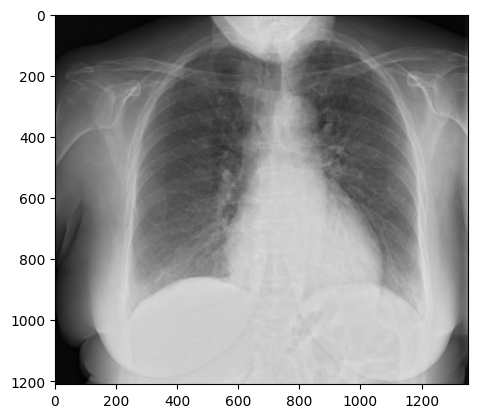

In [ ]:
#VISUALIZE THE DATA
%pylab inline
%matplotlib inline
img=mpimg.imread("/content/chest-xray-covid19-pneumonia/Data/train/COVID19/COVID19(100).jpg")
imgplot = plt.imshow(img)
plt.show()

Populating the interactive namespace from numpy and matplotlib


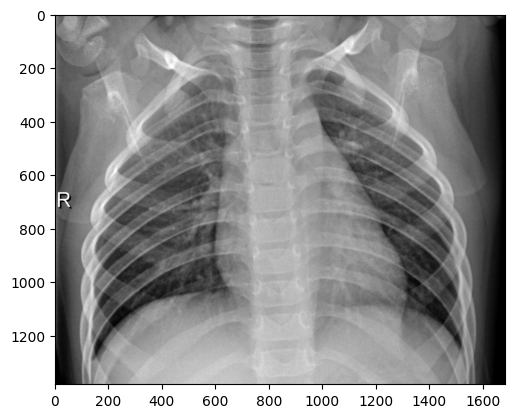

In [ ]:
%pylab inline
%matplotlib inline
img=mpimg.imread("/content/chest-xray-covid19-pneumonia/Data/train/NORMAL/NORMAL(1005).jpg")
imgplot = plt.imshow(img)
plt.show()

In [ ]:
#Preparing to train the images
#Rescale
# Shear_range
# Zoom_range
#Horizontal_flip

In [ ]:
validation_data_dir = r'/content/chest-xray-covid19-pneumonia/Data/test'
train_data_dir = r'/content/chest-xray-covid19-pneumonia/Data/train'

from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator ( rescale=1. /255,shear_range =0.2,zoom_range=0.2,horizontal_flip =True)
#Now this, will generate training generator data
#Target_size = mentioned image_width and image_height
#Class_mode =a Categorical'(because here three classes are there to classify)

test_datagen=ImageDataGenerator (rescale=1. /255)



validation_generator =test_datagen.flow_from_directory(validation_data_dir,target_size =(224,224),
                                                       batch_size=16,class_mode='categorical',shuffle=False)


train_generator =train_datagen.flow_from_directory(train_data_dir,target_size =(224,224),
                                                   batch_size=16,class_mode='categorical',shuffle=True)
#Now, this will generate testing generator data
#Target_size = mention the  image_width and image_height we need
#Batch_size = 16 it have a range from 16-512 can give how much we want
#Class_mode = Categorical(because here only three classes are there to classify)


Found 1288 images belonging to 3 classes.
Found 5144 images belonging to 3 classes.


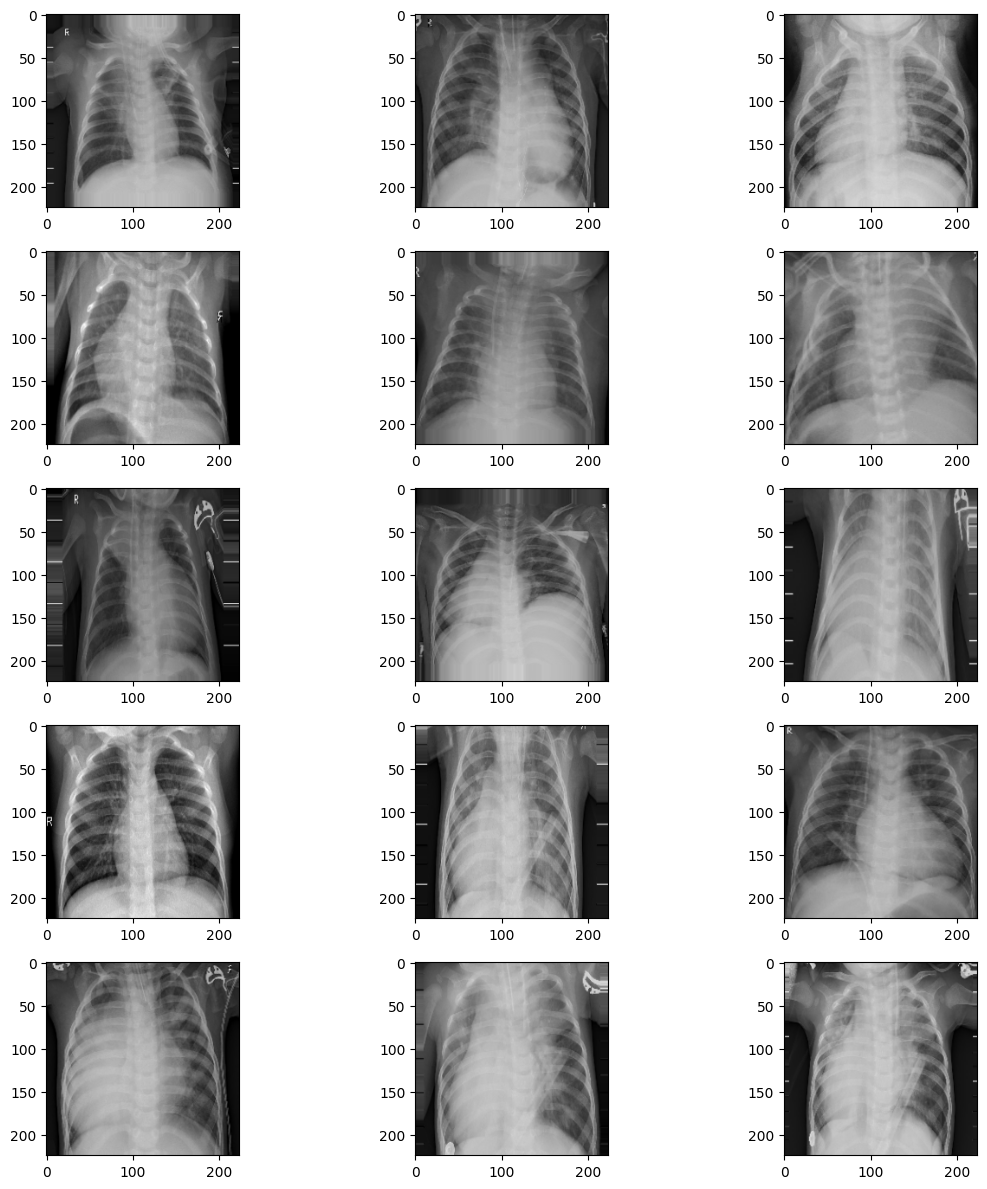

In [ ]:
#Visual Representation of Image Data
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
#Build the CNN model
#LAYERS IN CNN
 #Conlutional Layer
 #ReLu
 #Pooling Layer
 #Fully Connected Layer (Dense)

In [ ]:
image_size=(150,150,3)


model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=image_size))#64 neurons with 3*3 filter
model.add(MaxPooling2D(pool_size=(2,2)))#MaxPooling2D helps to reduce the size of the data
#This class allows to create convolutional neural network to extract feature from the images

model.add(Flatten())#Converts multi dimensional array to 1D channel
model.add(Dense(256)) #256 neurons with 3*3 filter
#Numbers of output nodes in the hidden layer

model.add(Activation('relu'))
model.add(Dense(1))#output layer
model.add(Activation('sigmoid')) #sigmoid activation function
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 350464)            0         
                                                                 
 dense_8 (Dense)             (None, 256)               89719040  
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                      

In [ ]:
#hidden layers
image_size = (150,150,3)

model = Sequential()
model.add(Conv2D(64,(3,3),activation = "relu", input_shape = image_size))
model.add(MaxPooling2D())

model.add(Conv2D( 128, (3,3), activation = "relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D( 256,(3,3), activation = "relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D( 512,(3,3), activation = "relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.15))

model.add(Dense(3, activation = "softmax"))

In [ ]:
# Compiling cnn model
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 54, 54, 128)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 256)      

In [ ]:
# Fitting the CNN model
history = model.fit(train_generator, validation_data=validation_generator,steps_per_epoch=30,epochs=80)

Epoch 1/80
30/30 [==============================] - 198s 5s/step - loss: 1.5388 - accuracy: 0.6417 - val_loss: 0.8531 - val_accuracy: 0.6645
Epoch 2/80
30/30 [==============================] - 143s 5s/step - loss: 0.8425 - accuracy: 0.6521 - val_loss: 0.7902 - val_accuracy: 0.6647
Epoch 3/80
30/30 [==============================] - 139s 5s/step - loss: 0.6340 - accuracy: 0.7309 - val_loss: 0.9729 - val_accuracy: 0.6190
Epoch 4/80
30/30 [==============================] - 140s 5s/step - loss: 0.4727 - accuracy: 0.8042 - val_loss: 0.3504 - val_accuracy: 0.8596
Epoch 5/80
30/30 [==============================] - 141s 5s/step - loss: 0.4396 - accuracy: 0.8326 - val_loss: 0.3547 - val_accuracy: 0.8593
Epoch 6/80
30/30 [==============================] - 139s 5s/step - loss: 0.3453 - accuracy: 0.8646 - val_loss: 0.4407 - val_accuracy: 0.8437
Epoch 7/80
30/30 [==============================] - 139s 5s/step - loss: 0.4208 - accuracy: 0.8263 - val_loss: 0.3950 - val_accuracy: 0.8591
Epoch 8/80
30

In [ ]:
## Finding accuracy
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.9406779408454895
validation_accuracy 0.9057154059410095


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


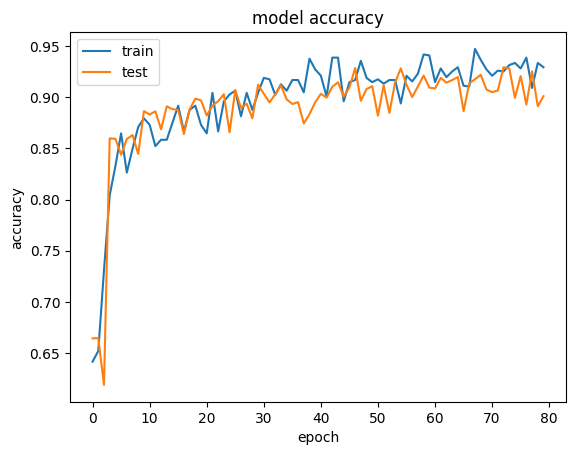

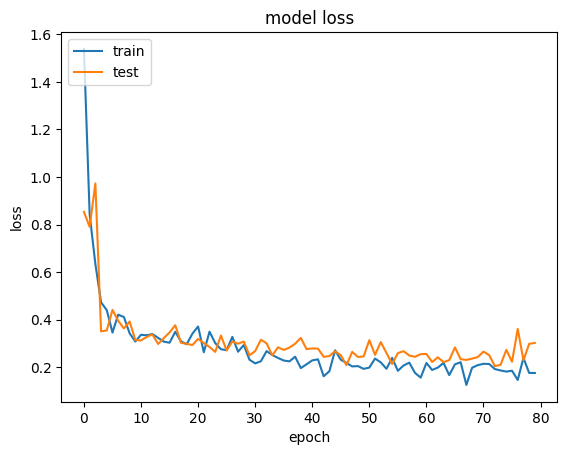

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(history.history.keys())
# summarize training for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Predict the image
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/chest-xray-covid19-pneumonia/Data/test/COVID19/COVID19(469).jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = model.predict(img_pred)
print(result)

1/1 [==============================] - 0s 26ms/step
[[1.1468037e-14 1.0000000e+00 5.4935525e-15]]


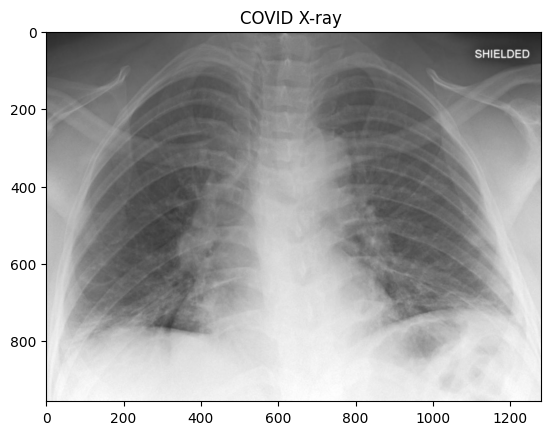

In [ ]:
import matplotlib.pyplot as plt

img1=mpimg.imread('/content/chest-xray-covid19-pneumonia/Data/test/COVID19/COVID19(469).jpg')
imgplot = plt.imshow(img1)
plt.title('COVID X-ray ')
plt.show()


In [ ]:
if result[0][0]==1:
    prediction ="Normal"
elif result[0][1]==1:
    prediction ="Covid"
else:
    prediction="Pnemonia"

print('Prediction: ',prediction)

Prediction:  Covid


1/1 [==============================] - 0s 23ms/step
[[2.7407619e-15 1.0000000e+00 1.0264365e-14]]


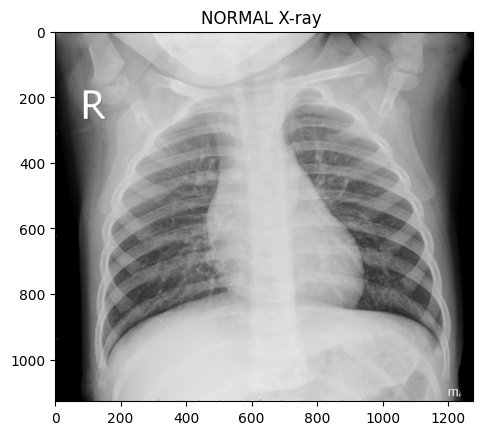

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
img_pred = image.load_img("/content/chest-xray-covid19-pneumonia/Data/test/NORMAL/NORMAL(1325).jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)


img=mpimg.imread("/content/chest-xray-covid19-pneumonia/Data/test/NORMAL/NORMAL(1325).jpg")
imgplot = plt.imshow(img)
plt.title('NORMAL X-ray ')
plt.show()


In [ ]:
if result[0][0]==1:
    prediction ="Negative"
elif result[0][1]==1:
    prediction ="Covid"
else:
    prediction="Pnemonia"

print('Prediction: ',prediction)

Prediction:  NEGATIVE


1/1 [==============================] - 0s 19ms/step
[[3.2030286e-15 1.0000000e+00 1.2139809e-15]]


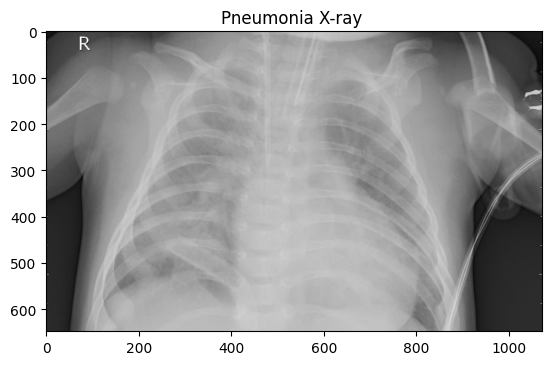

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
img_pred = image.load_img("/content/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3423).jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)


img=mpimg.imread("/content/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3423).jpg")
imgplot = plt.imshow(img)
plt.title('Pneumonia X-ray ')
plt.show()

In [ ]:
if result[0][0]==1:
    prediction ="Negative"
elif result[0][1]:
    prediction ="Covid"
else:
    prediction="Pnemonia"

print('Prediction: ',prediction)

Prediction:  PNEUMONIA


In [ ]:
print("PREDICTION OVER FOR THE MODEL")

PREDICTION OVER FOR THE MODEL
